# Artificial Neural Network

### Part 1 - Data Preprocessing

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')


In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
dataset.describe().T


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [8]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [9]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [11]:
#Create dummy variables
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [12]:
geography
#gender

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [13]:
## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

In [14]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [15]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [16]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Part 2 - Now let's make the ANN!

In [22]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [23]:
# Initialising the ANN
classifier = Sequential()

In [30]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer = 'he_uniform', activation='relu', input_dim=11))

#classifier.add(Dropout(0.3))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform',activation='sigmoid'))

###### Notes:
    
#init now is kernel_initializer-> how the weights needs to be intialized. for ReLU activation - 
he_uniform or he_normal works well

#input_dim=11  --> because input_dim is the total number of columns

units=6 --> second layer have 6 hidden neurons --> with optimization techniques we can come up with an optimized number

Dropout --> you can add some % of droupout neural networks.


In [32]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 247
Trainable params: 247
Non-trainable params: 0
__________________________________________________________

In [33]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

###### Notes

we need to reduce the loss fuction
optimizers --> sacastic gradiant decent / adagrad / adadelta/ adam .. adam is the most recent and popular

loss --> if there is one output 0 or 1 we should use 'binary_crossentropy', if we use multiple output use 'category_crossentropy'



In [38]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 4s 5ms/step - loss: 0.5672 - accuracy: 0.7679 - val_loss: 0.5039 - val_accuracy: 0.7906
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4895 - accuracy: 0.7972 - val_loss: 0.4751 - val_accuracy: 0.7921
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4546 - accuracy: 0.8033 - val_loss: 0.4593 - val_accuracy: 0.8023
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4267 - accuracy: 0.8217 - val_loss: 0.4439 - val_accuracy: 0.8061
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4004 - accuracy: 0.8275 - val_loss: 0.4346 - val_accuracy: 0.8092
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4098 - accuracy: 0.8214 - val_loss: 0.4272 - val_accuracy: 0.8175
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4009 - accuracy: 0.8283 - val_loss: 0.4206 - val_accuracy: 0.8285

Epoch 58/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3322 - accuracy: 0.8616 - val_loss: 0.3616 - val_accuracy: 0.8527
Epoch 59/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3314 - accuracy: 0.8585 - val_loss: 0.3654 - val_accuracy: 0.8538
Epoch 60/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3307 - accuracy: 0.8685 - val_loss: 0.3642 - val_accuracy: 0.8554
Epoch 61/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3362 - accuracy: 0.8634 - val_loss: 0.3662 - val_accuracy: 0.8519
Epoch 62/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3164 - accuracy: 0.8712 - val_loss: 0.3629 - val_accuracy: 0.8531
Epoch 63/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3170 - accuracy: 0.8679 - val_loss: 0.3641 - val_accuracy: 0.8519
Epoch 64/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3247 - accuracy: 0.8650 - val_loss: 0.3637 - val_accuracy:

In [44]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


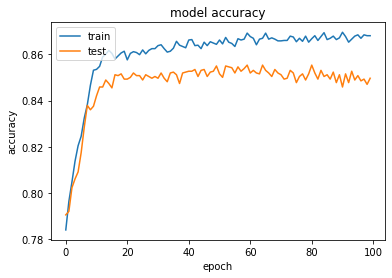

In [51]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

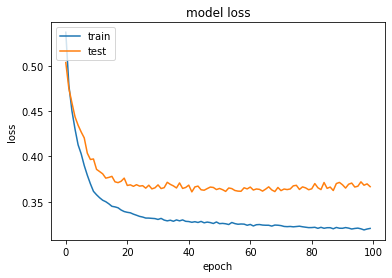

In [47]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Part 3 - Making the predictions and evaluating the model

In [53]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [69]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)

In [71]:
print(cm)
print('\n')
print(cr)

[[1544   63]
 [ 210  183]]


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [72]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)